<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/RNN_Model_(TensorFlow)_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 RNN Model (TensorFlow) IMDB Dataset**

# Install Library

In [4]:
!pip install tensorflow matplotlib scikit-learn --quiet

# Import Library

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengimpor Dataset IMDB

In [6]:
num_words = 30000
maxlen = 300
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#  Arsitektur TensorFlow RNN

In [7]:
model_rnn = Sequential([
    Embedding(num_words, 128, input_length=maxlen),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')
])

# Build the model with the input shape
model_rnn.build(input_shape=(None, maxlen))  # None represents the batch size

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,873,025 (14.77 MB)

 Trainable params: 3,873,025 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [8]:
history = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 260ms/step - accuracy: 0.5885 - loss: 0.6557 - val_accuracy: 0.6814 - val_loss: 0.5951
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 260ms/step - accuracy: 0.7569 - loss: 0.5028 - val_accuracy: 0.6825 - val_loss: 0.5869
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 262ms/step - accuracy: 0.8313 - loss: 0.3874 - val_accuracy: 0.7030 - val_loss: 0.6218
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 265ms/step - accuracy: 0.8730 - loss: 0.3011 - val_accuracy: 0.7960 - val_loss: 0.4972
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 266ms/step - accuracy: 0.8754 - loss: 0.3014 - val_accuracy: 0.6992 - val_loss: 0.7664
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 264ms/step - accuracy: 0.8963 - loss: 0.2602 - val_accuracy: 0.8042 - val_loss: 0.5204
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - accuracy: 0.9554 - loss: 0.1327 - val_accuracy: 0.7767 - val_loss: 0.5867
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 265ms/step - accuracy: 0.9654 -

# Menampilkan Contoh Prediksi Model

In [16]:
print("\n--- Contoh Prediksi ---")
for i in range(6):
    print(f"Contoh ke-{i+1} => Prediksi: {'Positif' if pred_labels[i][0] else 'Negatif'}, Label Asli: {'Positif' if y_test[i] == 1 else 'Negatif'}")


--- Contoh Prediksi ---
Contoh ke-1 => Prediksi: Negatif, Label Asli: Negatif
Contoh ke-2 => Prediksi: Positif, Label Asli: Positif
Contoh ke-3 => Prediksi: Negatif, Label Asli: Positif
Contoh ke-4 => Prediksi: Negatif, Label Asli: Negatif
Contoh ke-5 => Prediksi: Positif, Label Asli: Positif
Contoh ke-6 => Prediksi: Positif, Label Asli: Positif


# Evaluasi Akurasi, Presisi, Recall, F1 Squared, AUC dan ROC

In [10]:
pred_probs = model_rnn.predict(x_test)
pred_labels = (pred_probs >= 0.5).astype(int)

accuracy = np.mean(pred_labels.flatten() == y_test)
precision = precision_score(y_test, pred_labels)
recall = recall_score(y_test, pred_labels)
f1 = f1_score(y_test, pred_labels)
fpr, tpr, _ = roc_curve(y_test, pred_probs)
auc_score = auc(fpr, tpr)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc_score)

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step
Akurasi: 0.77672
Presisi: 0.7596846846846846
Recall: 0.80952
F1-Score: 0.7838109992254066
AUC: 0.8512042592


# Visualisasi

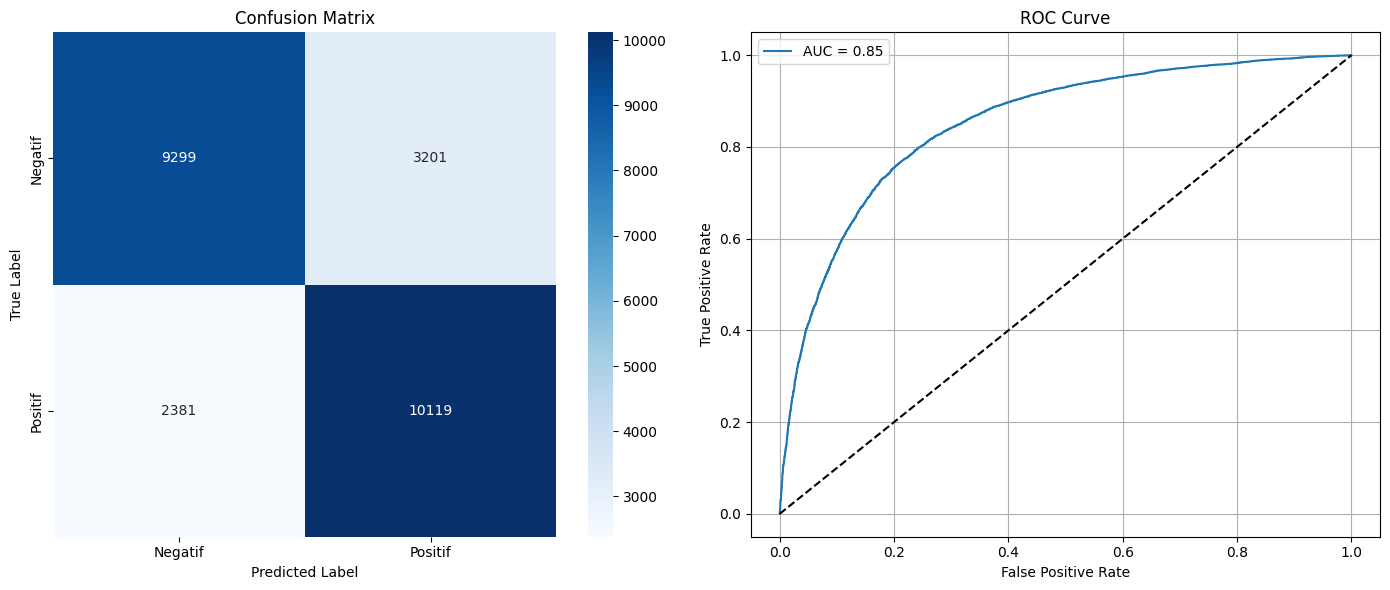

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cm = confusion_matrix(y_test, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[0])
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
axes[0].set_title("Confusion Matrix")

axes[1].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

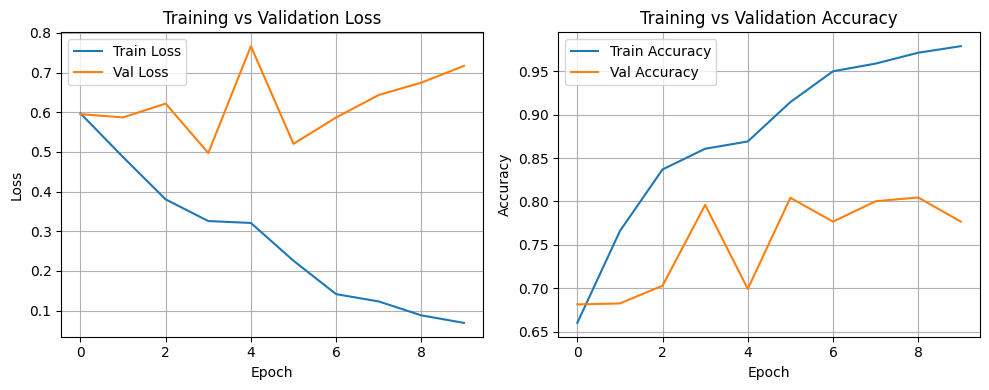

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()